In [140]:
##importing all required libraries
import numpy as np
import pandas as pd

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

import seaborn as sns
import matplotlib.pyplot as plt

from tqdm.auto import tqdm
import time

from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
#from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn import metrics

## **Data Collection**

In [141]:
df = pd.read_csv('cyberbullying_tweets.csv')
df

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying
...,...,...
47687,"Black ppl aren't expected to do anything, depe...",ethnicity
47688,Turner did not withhold his disappointment. Tu...,ethnicity
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity


In [142]:
df.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [143]:
df.tail()

,tweet_text,cyberbullying_type
47687,"Black ppl aren't expected to do anything, depe...",ethnicity
47688,Turner did not withhold his disappointment. Tu...,ethnicity
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity
47691,Bro. U gotta chill RT @CHILLShrammy: Dog FUCK ...,ethnicity


# **Data Statistics**

In [144]:
df.describe()

,tweet_text,cyberbullying_type
count,47692,47692
unique,46017,6
top,RT @sailorhg: the intro for my hardware hackin...,religion
freq,2,7998


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47692 non-null  object
 1   cyberbullying_type  47692 non-null  object
dtypes: object(2)
memory usage: 745.3+ KB


In [146]:
df.size

95384

In [147]:
df.columns

Index(['tweet_text', 'cyberbullying_type'], dtype='object')

## **Handling Null Values**

In [148]:
#cheching any missing values are there
df.isna().any()

,0
tweet_text,False
cyberbullying_type,False


In [149]:
df.isnull().sum()

,0
tweet_text,0
cyberbullying_type,0


In [150]:
## No Null Values in the dataset

## **Data Cleaning**

In [151]:
### Handling duplicate values
df.nunique()

,0
tweet_text,46017
cyberbullying_type,6


In [152]:
df['tweet_text'].nunique()

46017

In [153]:
df.drop_duplicates(inplace = True)

In [154]:
df

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying
...,...,...
47687,"Black ppl aren't expected to do anything, depe...",ethnicity
47688,Turner did not withhold his disappointment. Tu...,ethnicity
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity


In [155]:
# actual data set contains 47692 rows and 2 columns
# after removing duplicated rows. unique rows are 47656 rows × 2 columns

In [156]:
df['cyberbullying_type'].value_counts()

,count
cyberbullying_type,
religion,7997
age,7992
ethnicity,7959
gender,7948
not_cyberbullying,7937
other_cyberbullying,7823


In [157]:
#number of rows
len(df)

47656

In [158]:
len(df.columns)

2

## **Exploratory Data Analysis (EDA)**

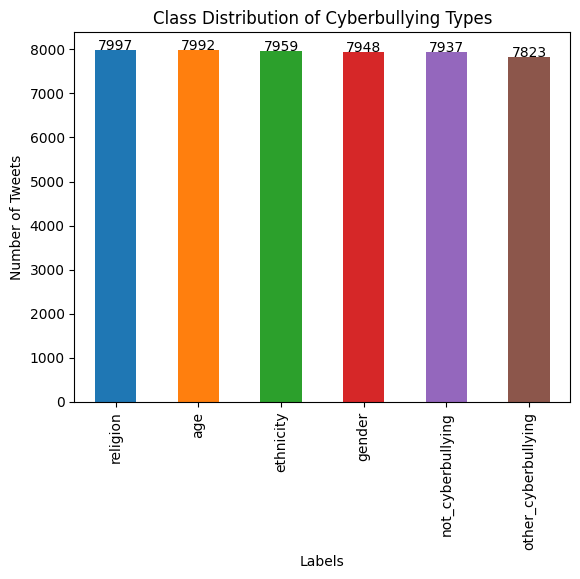

In [159]:

class_counts = df['cyberbullying_type'].value_counts()
ax = class_counts.plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b'])
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 3), textcoords='offset points')

plt.title('Class Distribution of Cyberbullying Types')
plt.xlabel('Labels')
plt.ylabel('Number of Tweets')
plt.show()

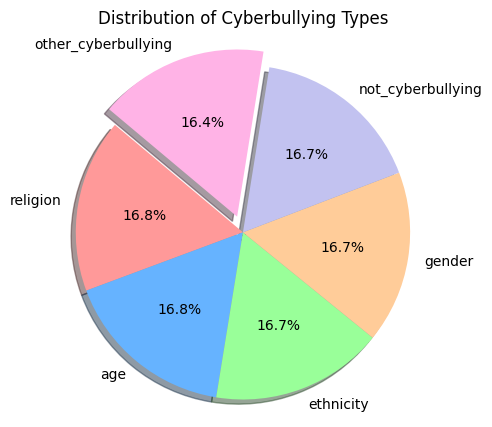

In [160]:
# we can't find difference with bar plot so i with pie chart
cyberbullying_counts = df['cyberbullying_type'].value_counts()
labels = cyberbullying_counts.index.tolist()
sizes = cyberbullying_counts.values.tolist()
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#c2c2f0', '#ffb3e6']
explode = (0, 0, 0, 0, 0, 0.1)  # Explode the last slice for emphasis because other_cyberbullying has low percentage
plt.figure(figsize=(5, 5))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('Distribution of Cyberbullying Types')
plt.show()

In [162]:

### not cyberbullying is only 16.7% . remaining 83.3% is cyberbullying

## **Data Preprocessing**

In [163]:
## converting cyberbullying_type from categorical to numerical
#  => 'not_cyberbullying' as 1
#  => 'ethnicity','gender','age','religion','other_cyberbullying' as 0 (means all comes under cyberbullying)


df['cyberbullying_type'].replace(['not_cyberbullying'],
                        [0], inplace=True)
df['cyberbullying_type'].replace(['ethnicity','gender','age','religion','other_cyberbullying'],
                        [1,1,1,1,1], inplace=True)

In [164]:
df

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",0
1,Why is #aussietv so white? #MKR #theblock #ImA...,0
2,@XochitlSuckkks a classy whore? Or more red ve...,0
3,"@Jason_Gio meh. :P thanks for the heads up, b...",0
4,@RudhoeEnglish This is an ISIS account pretend...,0
...,...,...
47687,"Black ppl aren't expected to do anything, depe...",1
47688,Turner did not withhold his disappointment. Tu...,1
47689,I swear to God. This dumb nigger bitch. I have...,1
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,1


Non Cyberbullying (0) :  16.65477589390633 %
Cyberbullying (1) :  83.34522410609367 %


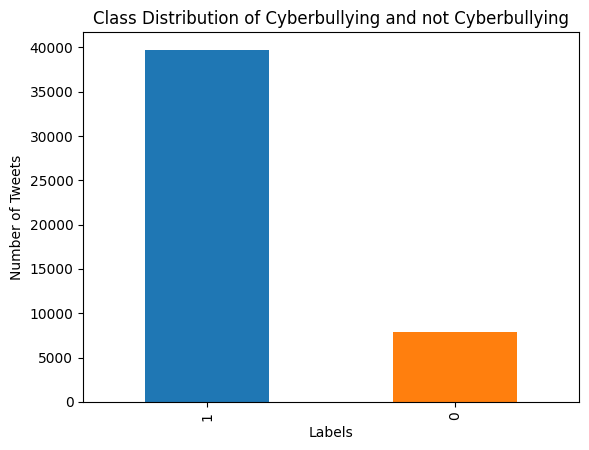

In [165]:
class_counts = df['cyberbullying_type'].value_counts()
class_counts.plot(kind='bar')

print("Non Cyberbullying (0) : ", df.cyberbullying_type.value_counts()[0]/len(df.cyberbullying_type)*100,"%")
print("Cyberbullying (1) : ", df.cyberbullying_type.value_counts()[1]/len(df.cyberbullying_type)*100,"%")
class_counts.plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b'])
plt.title('Class Distribution of Cyberbullying and not Cyberbullying')
plt.xlabel('Labels')
plt.ylabel('Number of Tweets')
plt.show()

In [166]:
df.sample(5)

,tweet_text,cyberbullying_type
17384,Most muslims i know hate saudi arabia and that...,1
27706,Otter Creek #Redneck: Fat #Coon http://t.co/Md...,1
38706,The generic anime high school bully who meets ...,1
14877,@Saffronian I asked nicely to remove me from t...,1
8190,a little girl saying nigga in a song and calli...,1


In [167]:
# Non Cyberbullying (0) :  16.65477589390633 %
# Cyberbullying (1) :  83.34522410609367 %

In [168]:
## Stop word removal

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [169]:
import re
import string

stop = stopwords.words('english')
regex = re.compile('[%s]' % re.escape(string.punctuation))

def test_re(s):
    return regex.sub('', s)

df['content_without_stopwords'] = df['tweet_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df['content_without_punctuation'] = df['content_without_stopwords'].apply(lambda x: regex.sub('',x))

del df['content_without_stopwords']
del df['tweet_text']


In [170]:
# stemming
porter_stemmer = PorterStemmer()


# punctuation removal
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [171]:
tok_list = []
size = df.shape[0]


# Word Tokenization
for i in range(size):
    word_data = df['content_without_punctuation'].iloc[i]
    nltk_tokens = nltk.word_tokenize(word_data)
    final = ''
    for w in nltk_tokens:
        final = final + ' ' + porter_stemmer.stem(w)
    tok_list.append(final)

df['content_tokenize'] = tok_list
del df['content_without_punctuation']

In [174]:
df

,cyberbullying_type,content_tokenize
0,0,in word katandandr food crapilici mkr
1,0,whi aussietv white mkr theblock imacelebritya...
2,0,xochitlsuckkk classi whore or red velvet cupcak
3,0,jasongio meh p thank head up concern anoth an...
4,0,rudhoeenglish thi isi account pretend kurdish...
...,...,...
47687,1,black ppl expect anyth depend anyth yet free ...
47688,1,turner withhold disappoint turner call court ...
47689,1,i swear god thi dumb nigger bitch i got bleac...
47690,1,yea fuck rt therealexel if your a nigger fuck...


In [175]:
# Digit removal

noNums = []
for i in range(len(df)):
    noNums.append(''.join([i for i in df['content_tokenize'].iloc[i] if not i.isdigit()]))

df['content'] = noNums
df.sample(3)

,cyberbullying_type,content_tokenize,content
30907,1,rt irwinskush 6 im a bad bitch you cant kill ...,rt irwinskush im a bad bitch you cant kill m...
33337,1,the girl high school bulli,the girl high school bulli
26527,1,rt srhbutt gamergat tri spout nonsens peopl h...,rt srhbutt gamergat tri spout nonsens peopl h...


In [176]:
df['content'][21]

' kid love😘❤ mohamad bin zay citi مدينة محمد بن زايد httptcoxrozsnn'

In [178]:
#remove emojis
import pandas as pd
import re

def remove_emojis(text):
    emoji_pattern = re.compile(
        "["
        "\U0001F600-\U0001F64F"  # Emoticons
        "\U0001F300-\U0001F5FF"  # Symbols & Pictographs
        "\U0001F680-\U0001F6FF"  # Transport & Map Symbols
        "\U0001F700-\U0001F77F"  # Alchemical Symbols
        "\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
        "\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
        "\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
        "\U0001FA00-\U0001FA6F"  # Chess Symbols
        "\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
        "\U00002702-\U000027B0"  # Dingbats
        "\U000024C2-\U0001F251"  # Enclosed Characters
        "]+",
        flags=re.UNICODE)

    return emoji_pattern.sub(r'', text)

df['content'] = df['content'].apply(remove_emojis)
print(df)

       cyberbullying_type                                   content_tokenize  \
0                       0              in word katandandr food crapilici mkr   
1                       0   whi aussietv white mkr theblock imacelebritya...   
2                       0    xochitlsuckkk classi whore or red velvet cupcak   
3                       0   jasongio meh p thank head up concern anoth an...   
4                       0   rudhoeenglish thi isi account pretend kurdish...   
...                   ...                                                ...   
47687                   1   black ppl expect anyth depend anyth yet free ...   
47688                   1   turner withhold disappoint turner call court ...   
47689                   1   i swear god thi dumb nigger bitch i got bleac...   
47690                   1   yea fuck rt therealexel if your a nigger fuck...   
47691                   1   bro u got ta chill rt chillshrammi dog fuck k...   

                                       

In [179]:
df['content'][21]

' kid love mohamad bin zay citi مدينة محمد بن زايد httptcoxrozsnn'

## **Feature Extraction using TF - IDF**

In [180]:

from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer, TfidfVectorizer

tfIdfVectorizer = TfidfVectorizer(use_idf = True, sublinear_tf = True)
tfIdf = tfIdfVectorizer.fit_transform(df.content.tolist())

print(tfIdf)
print(tfIdf.shape)

  (0, 32398)	0.22776219121624333
  (0, 9406)	0.6376817433484456
  (0, 15124)	0.39033179447015415
  (0, 27267)	0.4713131550484313
  (0, 52375)	0.2885859145405025
  (0, 24231)	0.28932602455584117
  (1, 13515)	0.19777389209953097
  (1, 52328)	0.37314497266152713
  (1, 34062)	0.3264525192101899
  (1, 45739)	0.3224854116001581
  (1, 46035)	0.3594883054936769
  (1, 48422)	0.18445728871143435
  (1, 24060)	0.3361420787680083
  (1, 47441)	0.3594883054936769
  (1, 51866)	0.14038062006037094
  (1, 3036)	0.37314497266152713
  (1, 51835)	0.16998207614306254
  (1, 32398)	0.1332770108305811
  (2, 9776)	0.4113951233211964
  (2, 50614)	0.44599842347341545
  (2, 40173)	0.30615786633130077
  (2, 35954)	0.26416724056433233
  (2, 51952)	0.323233172611139
  (2, 8168)	0.356988381735929
  (2, 52766)	0.48621199089713685
  :	:
  (47653, 16869)	0.21510693871097084
  (47653, 47875)	0.17046394692995237
  (47654, 47725)	0.5444954256061862
  (47654, 34408)	0.27633185917164826
  (47654, 49991)	0.38999436927636877
  (

In [181]:

df2 = pd.DataFrame(tfIdf[2].T.todense(), index=tfIdfVectorizer.get_feature_names_out(), columns=["TF-IDF"])
df2 = df2.sort_values('TF-IDF', ascending=False)

# top 10 features by TF-IDF score
print(df2.head(10))

                 TF-IDF
xochitlsuckkk  0.486212
velvet         0.445998
cupcak         0.411395
classi         0.356988
whore          0.323233
red            0.306158
or             0.264167
aa             0.000000
onstag         0.000000
ont            0.000000


In [182]:
import numpy as np
def display_scores(vectorizer, tfidf_result):
    scores = zip(vectorizer.get_feature_names_out(), np.asarray(tfidf_result.sum(axis=0)).ravel())
    sorted_scores = sorted(scores, key=lambda x: x[1], reverse=True)
    for item in sorted_scores[:25]:  # Display top 25 words
        print(f"{item[0]:50} Scores: {item[1]}")

# showing top 25 words
display_scores(tfIdfVectorizer, tfIdf)

bulli                                              Scores: 1251.469929021393
school                                             Scores: 1097.1057125512084
fuck                                               Scores: 1078.8760747320746
nigger                                             Scores: 863.4173019761954
dumb                                               Scores: 839.5028496406516
like                                               Scores: 764.8815331991569
girl                                               Scores: 754.7604024930455
high                                               Scores: 753.6119174599291
joke                                               Scores: 701.1002141569026
you                                                Scores: 646.5739485918343
rt                                                 Scores: 628.2268230515987
peopl                                              Scores: 613.9419391887868
rape                                               Scores: 610.64371178906

## **Data Splitting, Training and Data Resampling**

In [183]:

X = tfIdf
y = np.array(df['cyberbullying_type'])

#splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(38124, 53753)
(38124,)
(9532, 53753)
(9532,)


In [184]:
# Training data
unique_elements, counts_elements = np.unique(y_train,return_counts = True)
print(np.asarray((unique_elements, counts_elements)))

# Test data
unique_elements, counts_elements = np.unique(y_test,return_counts = True)
print(np.asarray((unique_elements, counts_elements)))

#random oversampling on traning data
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy = 'not majority')
X_over, y_over = oversample.fit_resample(X_train, y_train)

[[    0     1]
 [ 6364 31760]]
[[   0    1]
 [1573 7959]]


## **Cyberbullying Detection using Machine Learning classification models**

# Evaluating the model's performance using appropriate metrics.

In [185]:
def getStatsFromModel(model):
    print(classification_report(y_test, y_pred))

    from sklearn.metrics import precision_score, recall_score, f1_score


    # Precision
    precision = precision_score(y_test, y_pred, average='weighted') * 100
    print(f"Precision: {precision:.2f}%")

    # Recall
    recall = recall_score(y_test, y_pred, average='weighted') * 100
    print(f"Recall: {recall:.2f}%")

    # F1-Score
    f1 = f1_score(y_test, y_pred, average='weighted') * 100
    print(f"F1-Score: {f1:.2f}%")

    y_pred_proba = model.predict_proba(X_test_reduced)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    plt.figure(figsize=(4,4))
    plt.plot(recall, precision, marker='.')
    plt.title('Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.show()

    # Plot ROC curve
    logit_roc_auc = roc_auc_score(y_test, y_pred_proba)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    plt.figure(figsize=(4, 4))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0.0, 0.1])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [186]:
## my data is too large, it does't take large data so i reduced dimensions
# MemoryError: Unable to allocate 25.5 GiB for an array with shape (63520, 53807) and data type float64

# Apply TruncatedSVD to reduce dimensionality
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=100)

X_over_reduced = svd.fit_transform(X_over)
X_test_reduced = svd.transform(X_test)


## Gaussian Naive Baye

Accuracy:  0.7281787662610155
Accuracy Percentage: 72.82%
Confusion Matrix: 
 [[1382  191]
 [2400 5559]]
              precision    recall  f1-score   support

           0       0.37      0.88      0.52      1573
           1       0.97      0.70      0.81      7959

    accuracy                           0.73      9532
   macro avg       0.67      0.79      0.66      9532
weighted avg       0.87      0.73      0.76      9532

Precision: 86.75%
Recall: 72.82%
F1-Score: 76.23%


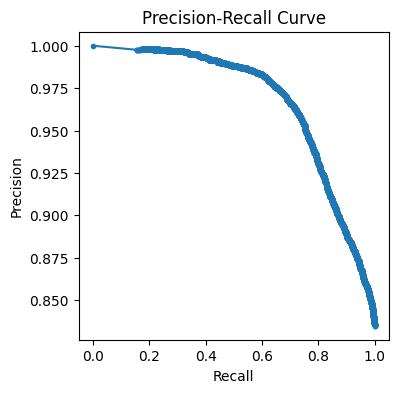

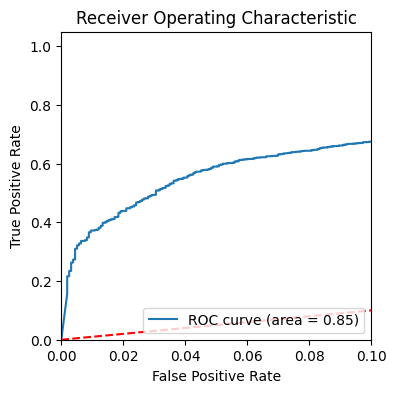

In [187]:
# Gaussian Naive Baye

gnb = GaussianNB()
gnbmodel = gnb.fit(X_over_reduced, y_over)

# Make predictions
y_pred = gnbmodel.predict(X_test_reduced)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)
print(f"Accuracy Percentage: {accuracy * 100:.2f}%")
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
getStatsFromModel(gnb)

The Gaussian Naive Baye model achieved an accuracy of 72.82% with a precision of 86.75% and a recall of 72.82%. The F1-score stands at 76.23%. The confusion matrix shows that while the model performs well in precision for class 1, it has lower precision for class 0 and overall balanced performance.










## Logistic Regression

Accuracy:  0.7784305497272346
Accuracy Percentage: 77.84%
Confusion Matrix: 
 [[1407  166]
 [1946 6013]]
              precision    recall  f1-score   support

           0       0.42      0.89      0.57      1573
           1       0.97      0.76      0.85      7959

    accuracy                           0.78      9532
   macro avg       0.70      0.82      0.71      9532
weighted avg       0.88      0.78      0.80      9532

Precision: 88.18%
Recall: 77.84%
F1-Score: 80.45%


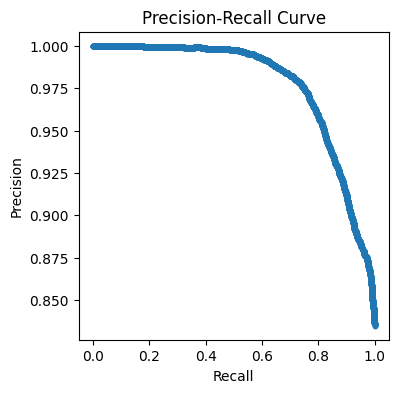

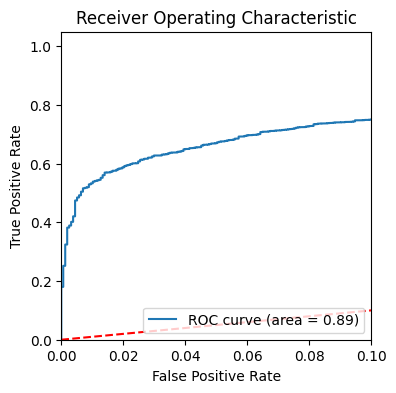

In [188]:
#  Logistic Regression

lgr = LogisticRegression()
lgr.fit(X_over_reduced, y_over)
y_pred = lgr.predict(X_test_reduced)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)
print(f"Accuracy Percentage: {accuracy * 100:.2f}%")
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
getStatsFromModel(lgr)


The Logistic model achieved an accuracy of 77.84% with a precision of 88.18% and a recall of 77.84%. The F1-score is 80.45%. While the model demonstrates strong precision for class 1, its performance for class 0 shows a trade-off between precision and recall.








## Decision Tree Classifier

Accuracy:  0.8031892572387747
Accuracy Percentage: 80.32%
Confusion Matrix: 
 [[ 678  895]
 [ 981 6978]]
              precision    recall  f1-score   support

           0       0.41      0.43      0.42      1573
           1       0.89      0.88      0.88      7959

    accuracy                           0.80      9532
   macro avg       0.65      0.65      0.65      9532
weighted avg       0.81      0.80      0.81      9532

Precision: 80.75%
Recall: 80.32%
F1-Score: 80.53%


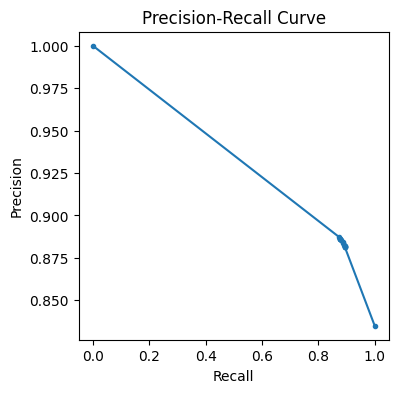

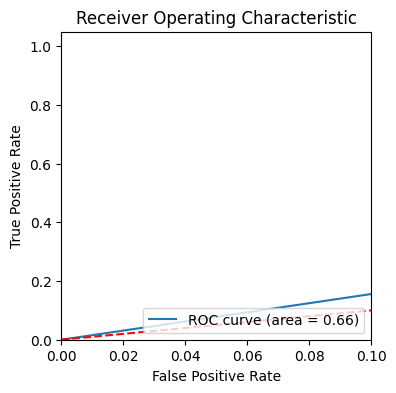

In [189]:
# Decision Tree Classifier

dtc = DecisionTreeClassifier()
dtc.fit(X_over_reduced, y_over)
y_pred = dtc.predict(X_test_reduced)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)
print(f"Accuracy Percentage: {accuracy * 100:.2f}%")
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
getStatsFromModel(dtc)

The Decision Tree Classifier model achieved an accuracy of 80.32% with a precision of 80.75% and a recall of 80.32%. The F1-score is 80.53%. While the model performs well overall, its precision and recall for class 0 are relatively low compared to class 1, indicating a trade-off between classes.

## Ensemble methods - Adaboost Classifier

Accuracy:  0.8031892572387747
Accuracy Percentage: 80.32%
Confusion Matrix: 
 [[1351  222]
 [1982 5977]]
              precision    recall  f1-score   support

           0       0.41      0.86      0.55      1573
           1       0.96      0.75      0.84      7959

    accuracy                           0.77      9532
   macro avg       0.68      0.80      0.70      9532
weighted avg       0.87      0.77      0.80      9532

Precision: 87.20%
Recall: 76.88%
F1-Score: 79.59%


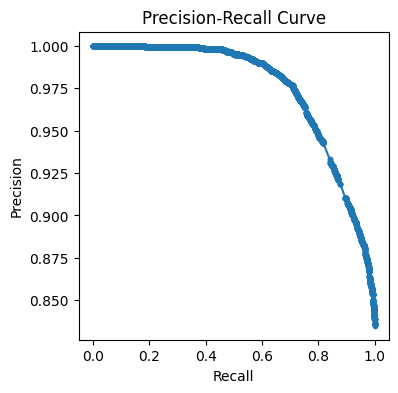

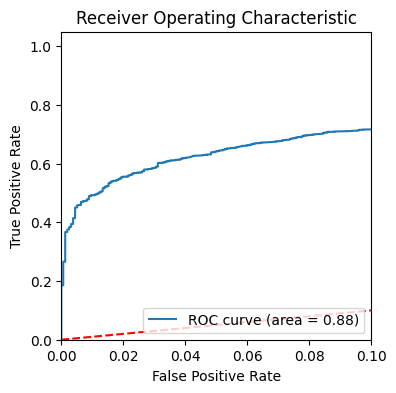

In [190]:
# Ensemble methods - Adaboost Classifier

abc = AdaBoostClassifier()
abc.fit(X_over_reduced, y_over)
y_pred = abc.predict(X_test_reduced)

print("Accuracy: ", accuracy)
print(f"Accuracy Percentage: {accuracy * 100:.2f}%")
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
getStatsFromModel(abc)

The  Adaboost Classifier model achieved an accuracy of 80.32% with a precision of 87.20% and a recall of 76.88%. The F1-score is 79.59%. It performs well for class 1 with high precision and good recall, but class 0 has lower precision and higher recall, reflecting a trade-off between the classes.








## Ensemble methods - Random Forest Classifier


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.4min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s


Accuracy:  0.8421107847251363
Accuracy Percentage: 84.21%
Confusion Matrix: 
 [[ 646  927]
 [ 578 7381]]
              precision    recall  f1-score   support

           0       0.53      0.41      0.46      1573
           1       0.89      0.93      0.91      7959

    accuracy                           0.84      9532
   macro avg       0.71      0.67      0.68      9532
weighted avg       0.83      0.84      0.83      9532

Precision: 82.89%
Recall: 84.21%
F1-Score: 83.40%


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s


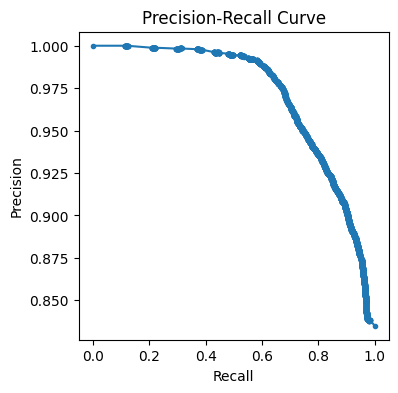

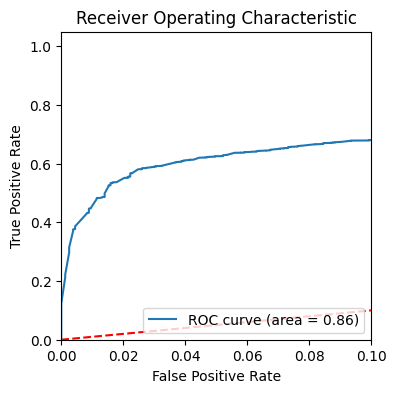

In [191]:
# Ensemble methods - Random Forest Classifier

rfc = RandomForestClassifier(verbose=True)
rfc.fit(X_over_reduced, y_over)
y_pred = rfc.predict(X_test_reduced)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)
print(f"Accuracy Percentage: {accuracy * 100:.2f}%")
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
getStatsFromModel(rfc)


The Random Forest Classifier model achieved an accuracy of 84.21% with a precision of 82.89% and a recall of 84.21%. The F1-score is 83.40%. It demonstrates strong performance for class 1 with high recall and precision, while class 0 shows lower recall and precision, highlighting a trade-off between the classes.



## support vector classifier

In [192]:
from sklearn.svm import SVC
clf = SVC(kernel='linear', C=1.0)  # You can change the kernel and C as needed
clf.fit(X_over_reduced, y_over)

# Make predictions

y_pred = clf.predict(X_test_reduced)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)
print(f"Accuracy Percentage: {accuracy * 100:.2f}%")

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy:  0.7616449853126311
Accuracy Percentage: 76.16%
Confusion Matrix:
 [[1436  137]
 [2135 5824]]

Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.91      0.56      1573
           1       0.98      0.73      0.84      7959

    accuracy                           0.76      9532
   macro avg       0.69      0.82      0.70      9532
weighted avg       0.88      0.76      0.79      9532



The SVM classifier model achieved an accuracy of 76.16% with a precision of 98.00% and a recall of 73.00% for class 1. The F1-score is 84.00%. The high precision for class 1 indicates the model is very accurate when predicting class 1, but the recall for class 0 is significantly higher, suggesting a trade-off where class 0 is more easily identified at the cost of class 1's recall.

## K-Nearest Neighbors (KNN)


In [193]:
#K-Nearest Neighbors (KNN)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can change the value of K as needed
knn.fit(X_over_reduced, y_over)
y_pred = knn.predict(X_test_reduced)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)
print(f"Accuracy Percentage: {accuracy * 100:.2f}%")

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy:  0.7674150230801511
Accuracy Percentage: 76.74%
Confusion Matrix:
 [[1142  431]
 [1786 6173]]

Classification Report:
               precision    recall  f1-score   support

           0       0.39      0.73      0.51      1573
           1       0.93      0.78      0.85      7959

    accuracy                           0.77      9532
   macro avg       0.66      0.75      0.68      9532
weighted avg       0.84      0.77      0.79      9532



The KNN model achieved an accuracy of 76.74% with a precision of 93.00% and a recall of 77.80% for class 1. The F1-score is 85.00%. The model performs well in identifying class 1 with high precision and a decent recall, but class 0 has lower precision and recall, indicating a trade-off between the two classes.







-----------------------------------


### Gaussian Naive Bayes - 72.82%

### Logistic Regression -  77.84%

### Decision Tree Classifier -  80.32%

### Ensemble methods  (Adaboost Classifier) - 80.32%

### Ensemble methods (Random Forest Classifier) -  84.21% (strong performance)

### SVM Classifier - 76.16%

### K-Nearest Neighbors (KNN) - 76.74%


### **Out of all classification models Ensemble method - Random Forest Classifier is gets more accuracy 84.21%**

### **Random Forest Classifier is best model with**
### **Accuracy 84.21%**
### **Precision: 82.89%**
### **Recall: 84.21%**
### **F1-Score: 83.40%%**
